In [6]:
import numpy as np
import pandas as pd
import adafdr.method as md
import adafdr.data_loader as dl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Microbiome: enigma_al

In [7]:
data_path = '/data3/martin/AdaFDRpaper_data'
file_path = data_path + '/microbiome/microbiome_enigma_al'
df_data = pd.read_csv(file_path, sep=',')
p = df_data['p_val'].as_matrix()
x = df_data[['ubiquity', 'mean_abun']].as_matrix()
print('p:', p.shape)
print('x:', x.shape)

p: (3993,)
x: (3993, 2)


## covariate visualization

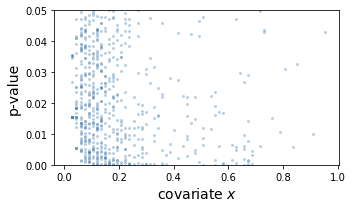

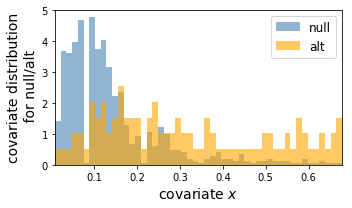

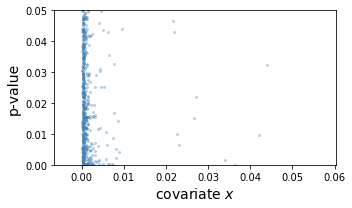

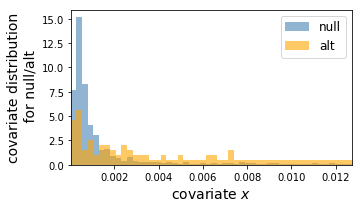

In [8]:
md.adafdr_explore(p, x, output_folder=None)

## hypothesis testing

In [9]:
# Baseline methods: BH, SBH
alpha = 0.2
n_rej, t_rej = md.bh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for BH: %d'%n_rej)
n_rej, t_rej, pi0_hat = md.sbh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for SBH: %d'%n_rej)
res = md.adafdr_test(p, x, alpha=alpha, fast_mode=True, single_core=False)
n_rej = res['n_rej']
t_rej = res['threshold']
print('# number of discoveries for adafdr: %d'%np.sum(p<=t_rej))

# number of discoveries for BH: 206
# number of discoveries for SBH: 437
# number of discoveries for adafdr: 503


In [5]:
%%bash -s "$file_path" "$alpha"
Rscript analysis_single.R $1 $2

[1] "data_path: /data3/martin/AdaFDRpaper_data/microbiome/microbiome_enigma_al"
[1] "alpha: 0.2"
[1] "Loading the data"
alpha = 0.59: FDPhat 0.5897, Number of Rej. 2301
alpha = 0.58: FDPhat 0.5796, Number of Rej. 2217
alpha = 0.57: FDPhat 0.5699, Number of Rej. 2067
alpha = 0.56: FDPhat 0.5599, Number of Rej. 1952
alpha = 0.55: FDPhat 0.55, Number of Rej. 1891
alpha = 0.54: FDPhat 0.5398, Number of Rej. 1845
alpha = 0.53: FDPhat 0.5299, Number of Rej. 1789
alpha = 0.52: FDPhat 0.5196, Number of Rej. 1757
alpha = 0.51: FDPhat 0.5097, Number of Rej. 1695
alpha = 0.5: FDPhat 0.5, Number of Rej. 1658
alpha = 0.49: FDPhat 0.4898, Number of Rej. 1562
alpha = 0.48: FDPhat 0.4796, Number of Rej. 1541
alpha = 0.47: FDPhat 0.47, Number of Rej. 1481
alpha = 0.46: FDPhat 0.4598, Number of Rej. 1442
alpha = 0.45: FDPhat 0.4494, Number of Rej. 1393
alpha = 0.44: FDPhat 0.44, Number of Rej. 1341
alpha = 0.43: FDPhat 0.4294, Number of Rej. 1246
alpha = 0.42: FDPhat 0.42, Number of Rej. 1212
alpha = 0.

Loading required package: nlme
This is mgcv 1.8-24. For overview type 'help("mgcv-package")'.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven hypothesis weighting results.
